In [1]:
#import the neccessary package
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# split into trainiing and testing dataSets
# import train_test_split from scikit learn
from sklearn.model_selection import train_test_split
pd.pandas.set_option('display.max.columns', None)

In [2]:
# load dataSet
data = pd.read_csv('creditData.csv')

In [4]:
# view the data
print('the shape of the data is: ',data.shape)
data.info()

the shape of the data is:  (30000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
Time      30000 non-null int64
V1        30000 non-null float64
V2        30000 non-null float64
V3        30000 non-null float64
V4        30000 non-null float64
V5        30000 non-null float64
V6        30000 non-null float64
V7        30000 non-null float64
V8        30000 non-null float64
V9        30000 non-null float64
V10       30000 non-null float64
V11       30000 non-null float64
V12       30000 non-null float64
V13       30000 non-null float64
V14       30000 non-null float64
V15       30000 non-null float64
V16       30000 non-null float64
V17       30000 non-null float64
V18       30000 non-null float64
V19       30000 non-null float64
V20       30000 non-null float64
V21       30000 non-null float64
V22       30000 non-null float64
V23       30000 non-null float64
V24       30000 non-null float64
V25       30000 non-null floa

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
3,27,-1.452187,1.765124,0.611669,1.176825,-0.445980,0.246826,-0.257566,1.092472,-0.607524,0.047156,0.783727,1.096386,-0.268094,0.768648,-0.524367,-0.808816,0.710386,-0.118369,0.979288,0.008713,0.082280,0.325782,-0.069107,0.020962,-0.044668,-0.243441,0.149180,0.120557,1.80,0
4,46,1.006589,-0.071105,0.347614,1.329684,-0.193240,0.155418,0.008574,0.146538,0.103844,0.031830,1.070981,0.940665,-0.729474,0.380115,-0.729126,-0.493402,0.043556,-0.405290,-0.092585,-0.091367,-0.020239,-0.018881,-0.120966,0.027382,0.593864,-0.334688,0.021368,0.015080,67.97,0


# EXPLORE THE DATA
<p> data cleaning </p>

In [6]:
# lets check if there are any null values
features = [features for features in data.columns if data[features].isnull().sum() > 1]
print(features)
print('no null values or missing values, thus we can go straight to other explorations')

[]
no null values or missing values, thus we can go straight to other explorations


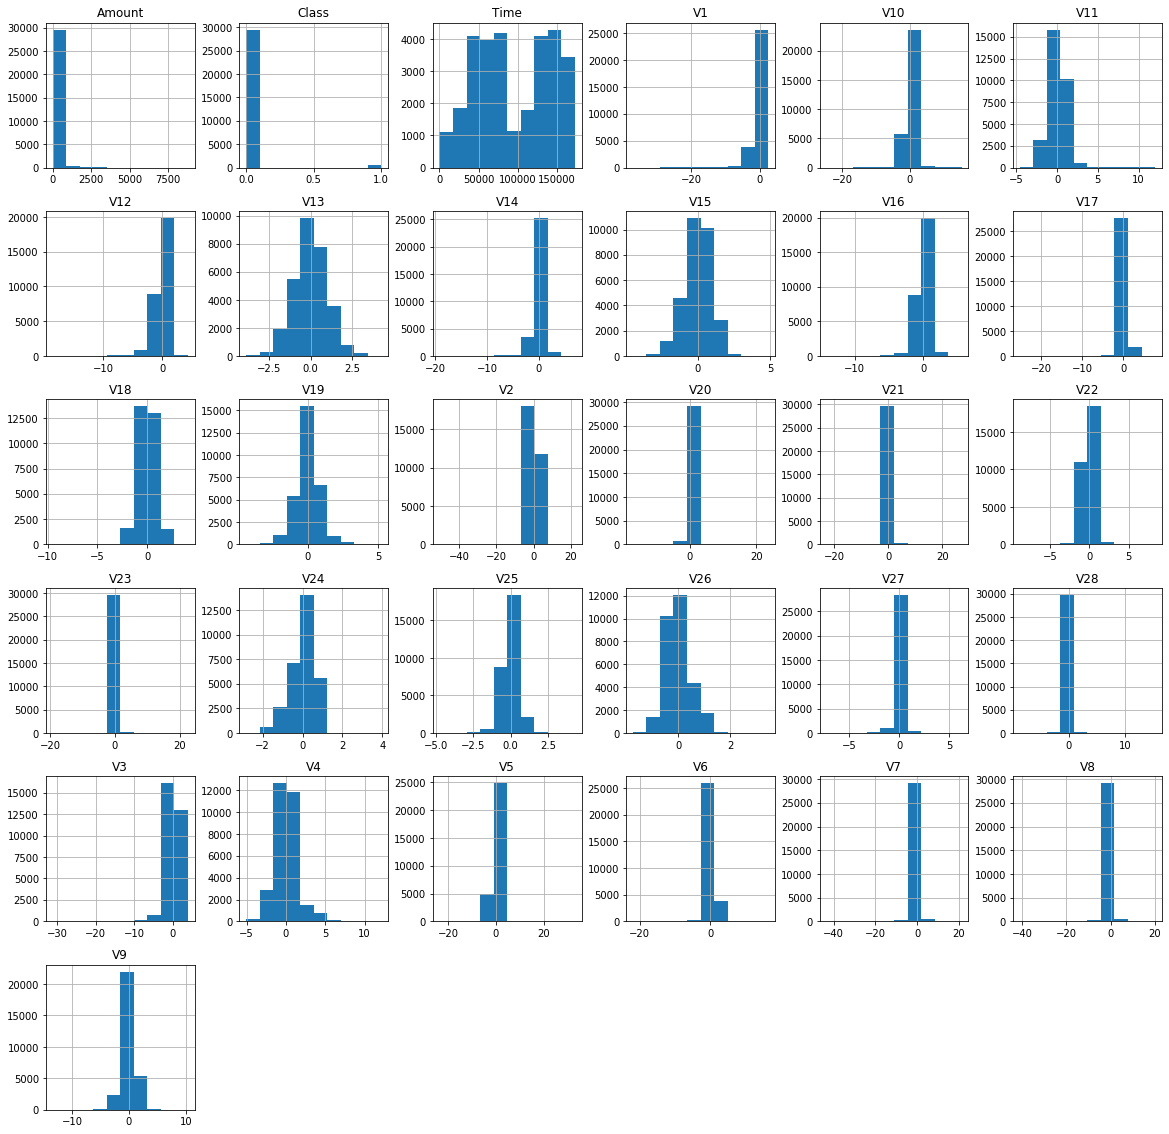

In [7]:
# lets see the relationship between all the variables
data.hist(figsize=(20,20))
plt.show();

<p>From the histogram above we can observe that the fradulent cases are so low compared to regular transaction. All the graph seem to be normally distributed except for time,amount and class. This dataset is a highly unbalanced dataset </p>

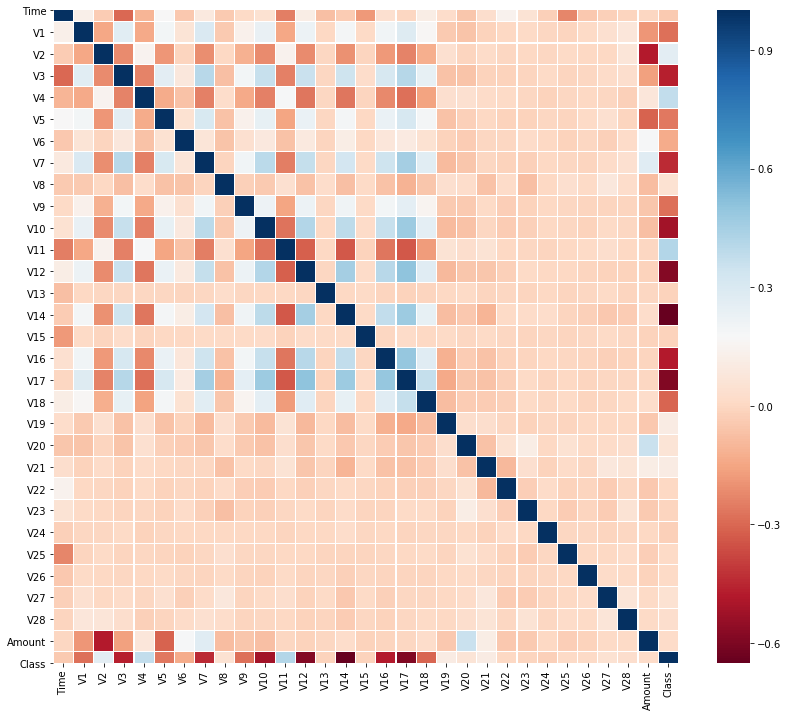

In [8]:
# lets see the correlation between the dataset.
corr = data.corr()
#plot a heatmap
ax, fig = plt.subplots(figsize=(14,12))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu")

In [9]:
corr['Class'].sort_values(ascending=False) 

Class     1.000000
V11       0.417095
V4        0.375381
V2        0.260442
V21       0.105786
V19       0.104639
V20       0.063348
V8        0.051685
V27       0.050633
V28       0.032063
Amount    0.019587
V26       0.013081
V25       0.009427
V22       0.002238
V23      -0.007655
V15      -0.012744
V13      -0.013653
V24      -0.023023
Time     -0.037645
V6       -0.132375
V5       -0.257371
V1       -0.276783
V9       -0.278519
V18      -0.302438
V7       -0.437169
V3       -0.462980
V16      -0.479181
V10      -0.514262
V12      -0.583364
V17      -0.591315
V14      -0.649509
Name: Class, dtype: float64

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000
mean,94594.550267,-0.059593,0.053697,-0.097670,0.061499,-0.042127,-0.020595,-0.078024,0.010595,-0.039805,-0.084353,0.061160,-0.092559,-0.003162,-0.100437,-0.002804,-0.058367,-0.100732,-0.037785,0.012023,0.005134,0.013280,0.001279,-0.004621,0.002434,0.003627,0.002982,0.001767,-0.000778,87.122425,0.01640
std,47499.928388,2.198463,1.770058,1.934382,1.541265,1.559891,1.343365,1.621805,1.399198,1.178215,1.404248,1.157556,1.365031,1.004172,1.366069,0.913204,1.099889,1.433648,0.942944,0.825118,0.748471,0.854834,0.736846,0.602003,0.603297,0.518098,0.480405,0.430506,0.307865,231.323726,0.12701
min,0.000000,-37.054295,-50.383269,-31.103685,-5.071241,-23.611865,-21.929312,-43.557242,-41.044261,-13.434066,-24.588262,-4.568390,-18.683715,-3.888606,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-4.364332,-17.118454,-22.797604,-8.887017,-19.254328,-2.836627,-4.781606,-1.732917,-7.263482,-8.656570,0.000000,0.00000
25%,53779.250000,-0.929204,-0.584373,-0.940541,-0.841228,-0.707440,-0.776528,-0.573763,-0.209255,-0.679586,-0.555476,-0.743791,-0.432139,-0.654067,-0.441480,-0.580218,-0.482207,-0.501966,-0.515629,-0.451992,-0.209597,-0.226442,-0.540756,-0.164121,-0.346582,-0.313015,-0.324701,-0.070560,-0.053127,5.290000,0.00000
50%,84905.000000,-0.002013,0.072790,0.176639,0.010518,-0.062482,-0.285185,0.029721,0.020413,-0.062982,-0.106698,-0.005064,0.129544,-0.014910,0.038630,0.041624,0.058104,-0.073557,-0.013212,0.011346,-0.060461,-0.024233,0.011583,-0.014252,0.040693,0.018379,-0.050057,0.001464,0.011076,21.730000,0.00000
75%,139139.750000,1.315314,0.822978,1.024752,0.775769,0.611420,0.392538,0.564847,0.333894,0.597017,0.431785,0.783150,0.608277,0.661164,0.484801,0.643077,0.520412,0.399052,0.496104,0.468256,0.136222,0.195434,0.526094,0.144389,0.437258,0.351345,0.244964,0.093139,0.081302,77.560000,0.00000
max,172788.000000,2.454930,22.057729,3.894346,12.114672,32.911462,16.493227,21.437514,20.007208,10.370658,15.236028,12.018913,4.406338,4.262851,6.991753,4.858398,5.600123,7.733456,4.093440,5.228342,23.643417,27.202839,8.361985,22.528412,3.951679,4.301757,3.463246,6.211230,15.270650,8787.000000,1.00000


In [11]:
# Percentage of the fraudulent transaction in comparison to regular transaction
fraud = data.loc[data.Class == 1]
regular = data.loc[data.Class == 0]
print('the percentage of fraud is', np.round((len(fraud)/len(data))*100, 4), '%')
print('the percentage of regular transaction is', np.round((len(regular)/len(data))*100, 4), '%') 

the percentage of fraud is 1.64 %
the percentage of regular transaction is 98.36 %


<p> this dataset is highly imbalanced. </p>
<p> the fraudulent case is very low compared to regular cases. </p>
<p> This could be a potential problem </p>

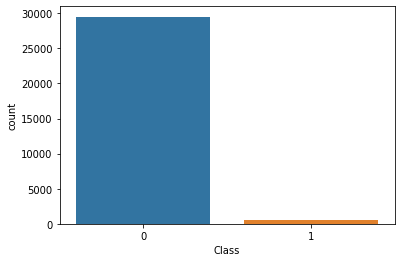

In [14]:
# lets plot a graph to show the comparison
sns.countplot(x = 'Class', data=data)

In [15]:
print('fraud transactions--', fraud.shape)
print('regular transactions --', regular.shape)

fraud transactions-- (492, 31)
regular transactions -- (29508, 31)


In [16]:
# We can fix this problem by either increasing the number of data. By using SMOTE 
# SMOTE will increase this number of fraud to be equal to the regular transaction
# Or we could sample out from the regular data. To make it equal to the fraud cases
print('random sampling of the regular data to be of the same length with the fraud data')
regular = regular.sample(fraud.shape[0])

random sampling of the regular data to be of the same length with the fraud data


In [17]:
print('new regular transactions shape--', regular.shape)

new regular transactions shape-- (492, 31)


In [18]:
regular.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13169,77543,-0.334375,1.141836,1.294207,0.058772,0.029188,-0.979634,0.711366,-0.073163,-0.394964,-0.510875,-0.215490,-0.079910,0.120100,-0.430365,0.893664,0.383684,0.006575,-0.138035,-0.088924,0.109365,-0.265402,-0.689505,-0.020004,0.328953,-0.160726,0.072234,0.246365,0.098022,1.79,0
19044,124625,-1.269395,1.499836,0.570939,3.949202,1.446803,1.244737,1.052662,-0.615815,-0.677955,3.959909,0.340552,-0.846753,-0.419832,-0.582251,0.016219,-0.381141,-0.629692,0.850875,1.554239,0.326380,0.042142,1.432295,-0.078947,0.311503,-0.433649,0.425450,-0.797040,-0.811856,10.59,0
17183,115049,-1.370743,2.044344,-1.477786,-1.586890,1.018999,-1.085253,1.420585,-0.111207,0.631211,1.554510,0.785977,0.006348,-1.499102,0.719104,-0.581301,-0.586805,-0.594643,0.094083,-0.092071,0.666744,0.113330,0.786784,-0.132437,0.701094,-0.069945,0.068472,1.009348,0.624466,0.22,0
14064,80432,0.950367,-0.361604,1.326672,1.546558,-1.254266,-0.120963,-0.656865,0.257028,0.946671,-0.102819,-0.326794,-0.382108,-1.844952,0.180121,1.004733,-0.069045,0.158287,-0.182543,-1.054531,-0.159928,0.207266,0.558251,-0.032427,0.575814,0.274181,-0.246713,0.059938,0.046008,75.00,0
11991,73158,1.161326,0.132804,0.584602,0.505994,-0.367302,-0.323856,-0.140738,0.088255,-0.176312,0.069998,1.823563,1.013973,-0.194716,0.549784,0.608815,0.164458,-0.300119,-0.517328,-0.261903,-0.146061,-0.169494,-0.509753,0.184006,0.208744,0.075118,0.095516,-0.018369,0.006549,0.89,0


In [19]:
# create a new dataFrame
df = pd.concat([fraud, regular], axis=0, ignore_index=True)

In [20]:
print('new dataset shape --', df.shape)

new dataset shape -- (984, 31)


In [21]:
# dropping the class label
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [22]:
# split the dataset with scikit-learn
X_train, X_test, Y_train_label, Y_test_label = train_test_split(X, y, test_size = 0.3, random_state=42)

In [23]:
X_train.shape

(688, 30)

In [25]:
# since we have different scale measurement.
# the time and amount data is not asymetrical
# to convert, we can use the standard normal distribution. StandardScaler to make it a normal curve
# with N(0,1)
#scaling all the data to standard normal distribution

#Import from scikit learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
# converts Y_train and Y_test to numpy array
Y_train_label = np.asarray(Y_train_label)
Y_test_label = np.asarray(Y_test_label)

In [28]:
# lets reshape the train and test data
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [29]:
X_train.shape

(688, 30, 1)

In [30]:
X_test.shape

(296, 30, 1)

In [98]:
# the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [99]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 30)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               3968      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [100]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [108]:
model.fit(X_train, Y_train_label, epochs=40)

Epoch 1/40
22/22 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9695
Epoch 2/40
22/22 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9651
Epoch 3/40
22/22 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.9578
Epoch 4/40
22/22 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.9651
Epoch 5/40
22/22 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9709
Epoch 6/40
22/22 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9637
Epoch 7/40
22/22 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9622
Epoch 8/40
22/22 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.9622
Epoch 9/40
22/22 [==============================] - 0s 3ms/step - loss: 0.0954 - accuracy: 0.9680
Epoch 10/40
22/22 [==============================] - 0s 4ms/step - loss: 0.0912 - accuracy: 0.9709
Epoch 11/40
22/22 [

In [109]:
predictions = model.predict(X_test)
predLabels=[]
for pr in predictions:
    predLabels.append(pr)

In [110]:
predLabels = np.around(predLabels)

In [111]:
print(confusion_matrix(Y_test_label, predLabels))

[[141   5]
 [ 14 136]]


In [112]:
print(classification_report(Y_test_label, predLabels))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       146
           1       0.96      0.91      0.93       150

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

